In [ ]:


from roboflow import Roboflow
rf = Roboflow(api_key="G5NOgWpGeRvNrfA8BZJS")
project = rf.workspace("swcyen").project("tomato_dect")
version = project.version(2)
dataset = version.download("yolov8")



                


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.3/85.3 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 30.9 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Tomato_dect-2 in yolov8:: 100%|██████████| 292/292 [00:00<00:00, 8364.26it/s]


In [2]:
path= '/content/Tomato_dect-2'

In [3]:
# Load dataset configuration
dataset_path = path + "/data.yaml"

# Check dataset information
print(open(dataset_path).read())

names:
- tomato
nc: 1
roboflow:
  license: CC BY 4.0
  project: tomato_dect
  url: https://universe.roboflow.com/swcyen/tomato_dect/dataset/2
  version: 2
  workspace: swcyen
test: ../test/images
train: ../train/images
val: ../valid/images



## **3.1- Training a YOLOv8 Model**


In [4]:
# Install Ultralytics library which has Yolo
!pip install -q ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 55.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 39.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 86.8 MB/s eta 0:00:00


In [5]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load YOLOv8 model (small version)
model = YOLO("yolov8s.pt")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 21.5M/21.5M [00:00<00:00, 369MB/s]


Note: The YOLOv8 image size is 640. We can change it, but this is the best size. Additionally, we didn't assign the model to a variable because we are training an existing model and don't want to overwrite it.

##### trial 1

YOLOv8 does the augmentations by itself.

In [6]:
# Train on the dataset
model.train(data=dataset_path, epochs=100, imgsz=640)

Ultralytics 8.3.120 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Tomato_dect-2/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line

100%|██████████| 755k/755k [00:00<00:00, 19.4MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

 22        [15, 18, 21]  1   2116435  ultralytics.nn.modules.head.Detect           [1, [128, 256, 512]]          
Model summary: 129 layers, 11,135,987 parameters, 11,135,971 gradients, 28.6 GFLOPs

Transferred 349/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 240MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 23.7±6.1 MB/s, size: 48.2 KB)


train: Scanning /content/Tomato_dect-2/train/labels... 80 images, 0 backgrounds, 0 corrupt: 100%|██████████| 80/80 [00:00<00:00, 742.96it/s]

train: New cache created: /content/Tomato_dect-2/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 46.5±81.5 MB/s, size: 25.1 KB)


val: Scanning /content/Tomato_dect-2/valid/labels... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<00:00, 832.09it/s]

val: New cache created: /content/Tomato_dect-2/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      4.04G       1.14      2.477      1.343        339        640: 100%|██████████| 5/5 [00:03<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.17s/it]

                   all         10         33      0.293      0.394      0.273      0.193

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      2/100      4.31G      1.084       1.68      1.264        310        640: 100%|██████████| 5/5 [00:01<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.56it/s]

                   all         10         33      0.463      0.758      0.517      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      4.34G      1.198      1.371      1.139        384        640: 100%|██████████| 5/5 [00:01<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.04it/s]

                   all         10         33      0.615      0.776      0.698      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      4.63G      1.015       1.16      1.137        208        640: 100%|██████████| 5/5 [00:01<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.49it/s]

                   all         10         33      0.769      0.727      0.819      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      4.67G     0.9652      1.019      1.094        204        640: 100%|██████████| 5/5 [00:01<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.14it/s]

                   all         10         33      0.734      0.727      0.836      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100       4.7G     0.9644     0.9881      1.111        262        640: 100%|██████████| 5/5 [00:01<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.64it/s]

                   all         10         33      0.799      0.721      0.811      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      4.99G     0.9305     0.9767      1.093        166        640: 100%|██████████| 5/5 [00:01<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.03it/s]

                   all         10         33      0.754      0.697      0.703      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      5.03G      0.855     0.8742      1.076        223        640: 100%|██████████| 5/5 [00:01<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.73it/s]

                   all         10         33      0.654      0.758      0.679      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      5.07G     0.9391     0.8301      1.089        237        640: 100%|██████████| 5/5 [00:01<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.38it/s]

                   all         10         33      0.482      0.333      0.356      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100       5.1G     0.9129     0.8201       1.05        290        640: 100%|██████████| 5/5 [00:01<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.14it/s]

                   all         10         33      0.517      0.697       0.54      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      5.14G     0.9166      0.885      1.124        161        640: 100%|██████████| 5/5 [00:01<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.07it/s]

                   all         10         33      0.585      0.788      0.676      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      5.59G      1.037     0.9873      1.137        261        640: 100%|██████████| 5/5 [00:01<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.17it/s]

                   all         10         33        0.8      0.485      0.688      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      5.62G      0.979      0.894      1.077        240        640: 100%|██████████| 5/5 [00:01<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.72it/s]

                   all         10         33      0.564      0.667      0.503      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      5.66G     0.9248      0.769       1.09        315        640: 100%|██████████| 5/5 [00:01<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.43it/s]

                   all         10         33      0.351      0.769      0.509      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100       5.7G     0.9107     0.7655      1.048        281        640: 100%|██████████| 5/5 [00:01<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.60it/s]

                   all         10         33      0.555      0.455      0.511      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      5.73G     0.9957     0.8371       1.08        224        640: 100%|██████████| 5/5 [00:01<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.74it/s]

                   all         10         33      0.623      0.606      0.618      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      5.77G     0.9888     0.8078      1.065        287        640: 100%|██████████| 5/5 [00:01<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.70it/s]

                   all         10         33      0.745      0.576      0.663      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      5.81G     0.8426     0.7409      1.059        269        640: 100%|██████████| 5/5 [00:01<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.74it/s]

                   all         10         33      0.653      0.606      0.687      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      5.84G     0.8902     0.7261      1.039        309        640: 100%|██████████| 5/5 [00:01<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.52it/s]

                   all         10         33      0.562      0.788      0.721      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      5.88G     0.9941     0.8074      1.121        252        640: 100%|██████████| 5/5 [00:01<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.59it/s]

                   all         10         33      0.388      0.424       0.36      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      5.91G     0.8777     0.7483      1.056        185        640: 100%|██████████| 5/5 [00:01<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.53it/s]

                   all         10         33      0.413      0.333      0.281      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      5.95G     0.9303     0.7443       1.05        238        640: 100%|██████████| 5/5 [00:01<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.85it/s]

                   all         10         33      0.324      0.333      0.303      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      5.99G     0.9356     0.7223      1.065        310        640: 100%|██████████| 5/5 [00:01<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.54it/s]

                   all         10         33      0.512      0.455      0.418      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      6.03G     0.8006     0.6801      1.053        221        640: 100%|██████████| 5/5 [00:01<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.12it/s]

                   all         10         33      0.754      0.758       0.74      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      6.06G      0.902     0.7532      1.024        251        640: 100%|██████████| 5/5 [00:01<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.43it/s]

                   all         10         33      0.683      0.849      0.775      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100       6.1G     0.8826     0.6972      1.051        393        640: 100%|██████████| 5/5 [00:01<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.63it/s]

                   all         10         33      0.707      0.805      0.786      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      6.13G     0.8648     0.6984      1.017        377        640: 100%|██████████| 5/5 [00:01<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.59it/s]

                   all         10         33      0.692      0.606      0.726      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      6.17G     0.8059      0.683      1.052        230        640: 100%|██████████| 5/5 [00:01<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.37it/s]

                   all         10         33      0.582      0.848      0.706       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      6.21G     0.7749     0.6462      1.063        247        640: 100%|██████████| 5/5 [00:01<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.53it/s]

                   all         10         33      0.655      0.697      0.704      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      6.24G     0.8499     0.6774      1.031        255        640: 100%|██████████| 5/5 [00:01<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.46it/s]

                   all         10         33      0.669      0.515      0.595      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      6.28G     0.8774     0.7379      1.061        165        640: 100%|██████████| 5/5 [00:01<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.92it/s]

                   all         10         33      0.685      0.788      0.779      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      6.32G     0.8154     0.6819      1.026        188        640: 100%|██████████| 5/5 [00:01<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.42it/s]

                   all         10         33      0.713      0.848      0.839      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      6.35G      0.849     0.6505      1.029        210        640: 100%|██████████| 5/5 [00:01<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.56it/s]

                   all         10         33      0.682      0.847       0.81      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      6.39G     0.7767     0.5856      1.023        252        640: 100%|██████████| 5/5 [00:01<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.23it/s]

                   all         10         33      0.632      0.883      0.805      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      6.42G     0.8176     0.6485      1.017        229        640: 100%|██████████| 5/5 [00:01<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.48it/s]

                   all         10         33       0.68      0.839      0.838      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      6.46G     0.8133     0.6422      1.028        252        640: 100%|██████████| 5/5 [00:01<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.62it/s]

                   all         10         33      0.707      0.879      0.846      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100       6.5G     0.7719     0.6174      1.016        262        640: 100%|██████████| 5/5 [00:01<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.64it/s]

                   all         10         33      0.519      0.909        0.7      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      6.53G     0.7808     0.6076      1.027        209        640: 100%|██████████| 5/5 [00:01<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.08it/s]

                   all         10         33      0.578      0.788      0.667      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      6.57G     0.8282     0.6701       1.03        379        640: 100%|██████████| 5/5 [00:01<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.27it/s]

                   all         10         33      0.742      0.784      0.731      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      6.61G     0.8351     0.6339      1.013        312        640: 100%|██████████| 5/5 [00:01<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.90it/s]

                   all         10         33      0.787      0.784      0.789      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      6.64G     0.7364     0.5703     0.9933        346        640: 100%|██████████| 5/5 [00:01<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.83it/s]

                   all         10         33      0.691      0.879      0.786      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      6.68G     0.7425     0.5679     0.9886        221        640: 100%|██████████| 5/5 [00:01<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.41it/s]

                   all         10         33      0.707      0.877      0.767      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      6.71G     0.6774     0.5498      1.008        184        640: 100%|██████████| 5/5 [00:01<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.39it/s]

                   all         10         33      0.702      0.926      0.761      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      6.75G     0.6671      0.544     0.9676        193        640: 100%|██████████| 5/5 [00:01<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.51it/s]

                   all         10         33      0.672      0.848      0.744      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      6.79G     0.7301     0.5525     0.9959        197        640: 100%|██████████| 5/5 [00:01<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.52it/s]

                   all         10         33       0.66      0.848      0.759      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      7.13G     0.7887     0.5803     0.9966        473        640: 100%|██████████| 5/5 [00:01<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.34it/s]

                   all         10         33      0.687      0.799      0.768      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      7.17G     0.7552     0.5655     0.9796        369        640: 100%|██████████| 5/5 [00:01<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.32it/s]

                   all         10         33      0.641      0.865      0.743      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100       7.2G     0.7282     0.5504      1.004        246        640: 100%|██████████| 5/5 [00:01<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.75it/s]

                   all         10         33      0.716      0.818      0.824      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      7.24G     0.7375     0.5474     0.9818        186        640: 100%|██████████| 5/5 [00:01<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.21it/s]

                   all         10         33      0.708      0.882      0.854      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      7.28G      0.706     0.5698      1.001        283        640: 100%|██████████| 5/5 [00:01<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.80it/s]

                   all         10         33      0.754      0.931       0.86      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      7.31G     0.7159     0.5408     0.9932        114        640: 100%|██████████| 5/5 [00:01<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.69it/s]

                   all         10         33      0.765      0.909      0.853      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      7.35G     0.6614     0.5393     0.9806        411        640: 100%|██████████| 5/5 [00:01<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.07it/s]

                   all         10         33      0.721      0.848      0.823      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      7.38G     0.7038     0.5571     0.9957        220        640: 100%|██████████| 5/5 [00:01<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.44it/s]

                   all         10         33      0.766      0.794      0.807      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      4.27G     0.7724     0.5654     0.9912        335        640: 100%|██████████| 5/5 [00:01<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.79it/s]

                   all         10         33      0.705      0.879      0.804      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      4.27G     0.7095     0.5373     0.9735        200        640: 100%|██████████| 5/5 [00:01<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.65it/s]

                   all         10         33      0.763      0.788      0.808      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      4.27G      0.663     0.5257     0.9772        213        640: 100%|██████████| 5/5 [00:01<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.79it/s]

                   all         10         33      0.726      0.963       0.83      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      4.27G     0.7251     0.5094     0.9475        292        640: 100%|██████████| 5/5 [00:01<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.52it/s]

                   all         10         33      0.687       0.97      0.826      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      4.27G      0.744     0.5445     0.9797        360        640: 100%|██████████| 5/5 [00:01<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.39it/s]

                   all         10         33      0.731      0.822      0.816      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      4.27G     0.7499     0.5442     0.9782        355        640: 100%|██████████| 5/5 [00:01<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.72it/s]

                   all         10         33      0.778      0.788      0.776      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      4.27G     0.7696     0.5457     0.9696        265        640: 100%|██████████| 5/5 [00:01<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.42it/s]

                   all         10         33      0.713      0.788      0.781      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      4.27G     0.6404     0.4783      0.942        350        640: 100%|██████████| 5/5 [00:01<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.74it/s]

                   all         10         33      0.705      0.818      0.807      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100       4.5G     0.7276     0.5086     0.9603        262        640: 100%|██████████| 5/5 [00:01<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.28it/s]

                   all         10         33      0.697      0.905      0.839      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      4.53G     0.6483     0.4805     0.9547        248        640: 100%|██████████| 5/5 [00:01<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.91it/s]

                   all         10         33      0.734      0.838      0.858      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      4.56G     0.6714     0.4915     0.9521        286        640: 100%|██████████| 5/5 [00:01<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.85it/s]

                   all         10         33      0.659      0.878      0.807      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100       4.6G     0.6987      0.485     0.9426        215        640: 100%|██████████| 5/5 [00:01<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.28it/s]

                   all         10         33      0.689      0.758      0.785       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      4.64G     0.5965     0.4353      0.941        309        640: 100%|██████████| 5/5 [00:01<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.76it/s]

                   all         10         33      0.695       0.76       0.78      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      4.67G     0.7003     0.5172     0.9658        287        640: 100%|██████████| 5/5 [00:01<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.86it/s]

                   all         10         33      0.733      0.788      0.787      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      4.71G     0.6117     0.4567     0.9648        316        640: 100%|██████████| 5/5 [00:01<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.35it/s]

                   all         10         33      0.746      0.799      0.808      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      4.75G     0.5549     0.4289     0.9275        214        640: 100%|██████████| 5/5 [00:01<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.91it/s]

                   all         10         33      0.784      0.818      0.827      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      4.78G     0.6037     0.4252     0.9472        215        640: 100%|██████████| 5/5 [00:01<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.32it/s]

                   all         10         33       0.79      0.818      0.832      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      4.82G     0.5609     0.4204     0.9438        143        640: 100%|██████████| 5/5 [00:01<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.11it/s]

                   all         10         33      0.792      0.818      0.832      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      5.07G      0.665     0.4663     0.9303        302        640: 100%|██████████| 5/5 [00:01<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.73it/s]

                   all         10         33      0.783      0.877       0.86      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      5.11G     0.6193     0.4454     0.9365        174        640: 100%|██████████| 5/5 [00:01<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.73it/s]

                   all         10         33      0.805      0.874      0.877      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      5.15G      0.585       0.44     0.9356        215        640: 100%|██████████| 5/5 [00:01<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.03it/s]

                   all         10         33      0.826      0.865      0.884       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      5.18G     0.6376     0.4491     0.9403        246        640: 100%|██████████| 5/5 [00:01<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.10it/s]

                   all         10         33      0.794      0.932      0.873      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      5.57G     0.6267     0.4428     0.9303        256        640: 100%|██████████| 5/5 [00:01<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.58it/s]

                   all         10         33      0.795      0.938       0.87      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      5.61G     0.6368      0.437     0.9333        459        640: 100%|██████████| 5/5 [00:01<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.29it/s]

                   all         10         33       0.82      0.968      0.879      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      5.64G     0.6063     0.4355     0.9431        297        640: 100%|██████████| 5/5 [00:01<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.55it/s]

                   all         10         33      0.841      0.962      0.868      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      6.06G     0.6195     0.4257       0.93        223        640: 100%|██████████| 5/5 [00:01<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.35it/s]

                   all         10         33       0.82      0.964      0.839      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100       6.1G     0.5714     0.4446     0.9393        200        640: 100%|██████████| 5/5 [00:01<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.68it/s]

                   all         10         33      0.816      0.909      0.843      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      6.13G     0.5365     0.3905     0.9035        401        640: 100%|██████████| 5/5 [00:01<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.28it/s]

                   all         10         33      0.794      0.939      0.835      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      6.17G     0.5318     0.4002     0.9304        285        640: 100%|██████████| 5/5 [00:01<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.49it/s]

                   all         10         33      0.809      0.899      0.831      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      6.21G     0.6175     0.4239       0.92        251        640: 100%|██████████| 5/5 [00:01<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.22it/s]

                   all         10         33      0.785      0.909      0.812      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      6.24G      0.519     0.3801     0.9249        265        640: 100%|██████████| 5/5 [00:01<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.36it/s]

                   all         10         33      0.779      0.879      0.787      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      6.28G     0.5802     0.3998     0.9116        351        640: 100%|██████████| 5/5 [00:01<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.05it/s]

                   all         10         33      0.783      0.877       0.81      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      6.32G     0.5901     0.4099     0.9265        278        640: 100%|██████████| 5/5 [00:01<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.45it/s]

                   all         10         33      0.742      0.909      0.805      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      6.35G     0.5437     0.3939     0.9071        314        640: 100%|██████████| 5/5 [00:01<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.16it/s]

                   all         10         33      0.731      0.907       0.81      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      6.39G     0.5857      0.418     0.9297        313        640: 100%|██████████| 5/5 [00:01<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.36it/s]

                   all         10         33       0.71      0.909      0.806       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      6.43G     0.5033       0.38     0.9148        332        640: 100%|██████████| 5/5 [00:01<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.34it/s]

                   all         10         33      0.734      0.848      0.801      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      6.46G     0.5897     0.4179     0.9325        170        640: 100%|██████████| 5/5 [00:01<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.39it/s]

                   all         10         33      0.734      0.848      0.805      0.622


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100       6.5G     0.4703      0.349     0.8487        100        640: 100%|██████████| 5/5 [00:02<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.66it/s]

                   all         10         33      0.734      0.848      0.809       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      6.53G     0.5392     0.3954     0.8793        312        640: 100%|██████████| 5/5 [00:01<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.54it/s]

                   all         10         33      0.731      0.939      0.817      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      6.57G     0.4842     0.3952     0.8752        124        640: 100%|██████████| 5/5 [00:01<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.37it/s]

                   all         10         33      0.751      0.939      0.839      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      6.61G     0.4642     0.3322     0.8453        217        640: 100%|██████████| 5/5 [00:01<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.51it/s]

                   all         10         33      0.761       0.97      0.841      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      6.64G     0.4916     0.3484     0.8679         99        640: 100%|██████████| 5/5 [00:01<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.14it/s]

                   all         10         33      0.779      0.959       0.84      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      6.68G     0.5518     0.3952     0.8689        156        640: 100%|██████████| 5/5 [00:01<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.06it/s]

                   all         10         33      0.796       0.97       0.85      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      6.71G     0.4732     0.3449     0.8499        200        640: 100%|██████████| 5/5 [00:01<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.02it/s]

                   all         10         33      0.792       0.97      0.855      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      6.75G     0.4904     0.3451     0.8473        201        640: 100%|██████████| 5/5 [00:01<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.13it/s]

                   all         10         33      0.796       0.97       0.86      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      6.79G     0.4945     0.3482     0.8546        188        640: 100%|██████████| 5/5 [00:01<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.27it/s]

                   all         10         33      0.797       0.97       0.86      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      6.82G     0.4856     0.3471     0.8633        211        640: 100%|██████████| 5/5 [00:01<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.39it/s]

                   all         10         33        0.8      0.967      0.859      0.653



100 epochs completed in 0.058 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 22.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.120 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.74it/s]


                   all         10         33      0.826      0.866      0.883      0.676
Speed: 0.2ms preprocess, 4.0ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e9567689050>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

evaluate

In [7]:
metrics = model.val(data=dataset_path)

Ultralytics 8.3.120 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1070.8±268.6 MB/s, size: 36.8 KB)


val: Scanning /content/Tomato_dect-2/valid/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.06it/s]


                   all         10         33      0.826      0.865      0.884      0.676
Speed: 0.2ms preprocess, 25.9ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/train2


test:

In [9]:
model = YOLO(model.trainer.best)  # Use the best weights


AttributeError: 'NoneType' object has no attribute 'best'


image 1/1 /content/Tomato_dect-2/test/images/Image_13_jpg.rf.51aef40e628ee5b8b67eda2346746275.jpg: 640x640 2 tomatos, 20.8ms
Speed: 2.9ms preprocess, 20.8ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


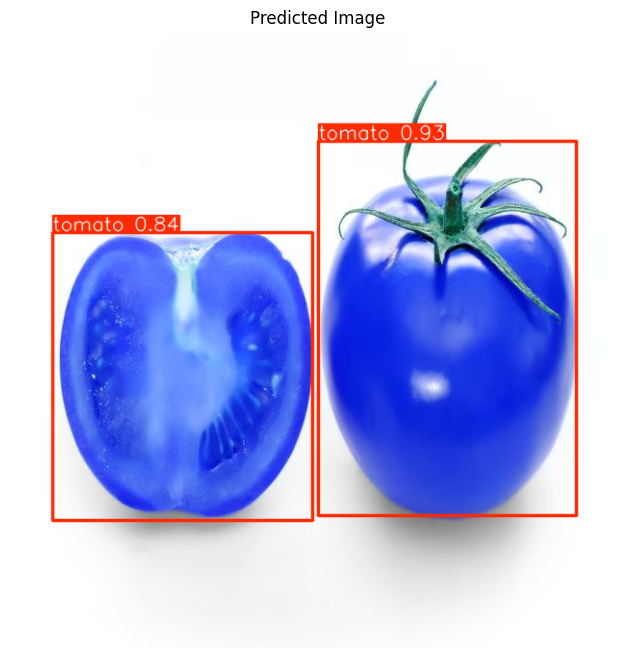

In [10]:
results = model("/content/Tomato_dect-2/test/images/Image_13_jpg.rf.51aef40e628ee5b8b67eda2346746275.jpg", save=True)

# Convert result to a NumPy array and display
predicted_image = results[0].plot()  # Convert prediction to an image

plt.figure(figsize=(8, 8))
plt.imshow(predicted_image)
plt.axis("off")
plt.title("Predicted Image")
plt.show()


image 1/1 /content/Tomato_dect-2/test/images/Image_78_jpg.rf.da0e176a741d652f257b53c172f85a9e.jpg: 640x640 7 tomatos, 16.0ms
Speed: 2.3ms preprocess, 16.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


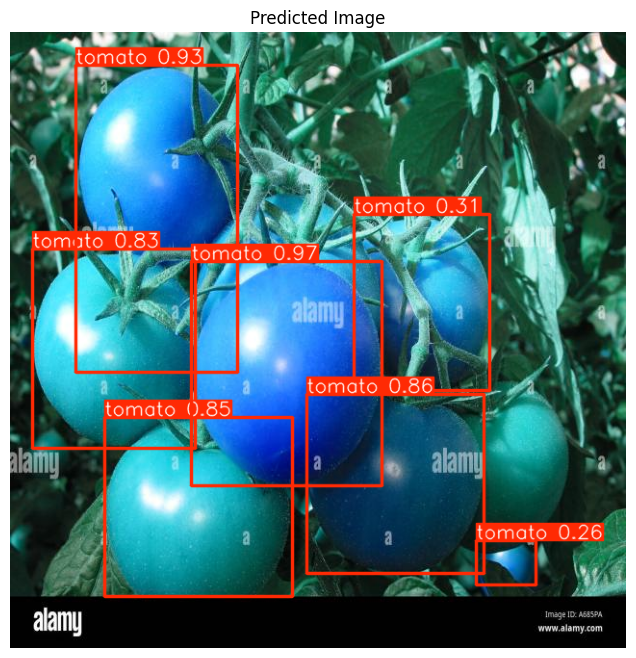

In [11]:
results = model("/content/Tomato_dect-2/test/images/Image_78_jpg.rf.da0e176a741d652f257b53c172f85a9e.jpg", save=True)

# Convert result to a NumPy array and display
predicted_image = results[0].plot()  # Convert prediction to an image

plt.figure(figsize=(8, 8))
plt.imshow(predicted_image)
plt.axis("off")
plt.title("Predicted Image")
plt.show()

In [1]:


from roboflow import Roboflow
rf = Roboflow(api_key="SQfUS0dg6S8gIUIpBhnb")
project = rf.workspace("ademas").project("segmentasi-daun")
version = project.version(4)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


In [2]:
path= '/Users/rahafmasmali/Desktop/T2/computer-vision-week-project-gharsa/Segmentasi-Daun-4'

In [3]:
# Load dataset configuration
dataset_path = path + "/data.yaml"

# Check dataset information
print(open(dataset_path).read())

names:
- leaf
nc: 1
roboflow:
  license: CC BY 4.0
  project: segmentasi-daun
  url: https://universe.roboflow.com/ademas/segmentasi-daun/dataset/4
  version: 4
  workspace: ademas
test: ../test/images
train: ../train/images
val: ../valid/images



In [4]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load YOLOv8 model (small version)
model = YOLO("yolov8s.pt")

In [5]:
model.train(data=dataset_path, epochs=100, imgsz=640)

Ultralytics 8.3.120 🚀 Python-3.13.3 torch-2.7.0 CPU (Apple M3)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/Users/rahafmasmali/Desktop/T2/computer-vision-week-project-gharsa/Segmentasi-Daun-4/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=

train: Scanning /Users/rahafmasmali/Desktop/T2/computer-vision-week-project-gharsa/Segmentasi-Daun-4/train/labels.cache... 117 images, 0 backgrounds, 0 corrupt: 100%|██████████| 117/117 [00:00<?, ?it/s]

val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 166.4±60.6 MB/s, size: 29.5 KB)



'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
val: Scanning /Users/rahafmasmali/Desktop/T2/computer-vision-week-project-gharsa/Segmentasi-Daun-4/valid/labels.cache... 11 images, 0 backgrounds, 0 corrupt: 100%|██████████| 11/11 [00:00<?, ?it/s]
'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.


Plotting labels to /Users/rahafmasmali/Desktop/T2/computer-vision-week-project-gharsa/runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to /Users/rahafmasmali/Desktop/T2/computer-vision-week-project-gharsa/runs/detect/train2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100         0G     0.6823      2.192      1.235         13        640: 100%|██████████| 8/8 [01:25<00:00, 10.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.11s/it]

                   all         11         11          1      0.813      0.946      0.831

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      2/100         0G     0.4673      1.079       1.08         13        640: 100%|██████████| 8/8 [01:13<00:00,  9.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.27s/it]

                   all         11         11      0.986          1      0.995      0.925



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100         0G     0.4895     0.9424      1.064         15        640: 100%|██████████| 8/8 [01:17<00:00,  9.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.27s/it]

                   all         11         11      0.898          1      0.995      0.911

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      4/100         0G     0.4966     0.8204      1.069         18        640: 100%|██████████| 8/8 [01:11<00:00,  8.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.27s/it]

                   all         11         11       0.84          1      0.995      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100         0G     0.4809     0.6835      1.075         16        640: 100%|██████████| 8/8 [01:10<00:00,  8.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.27s/it]

                   all         11         11      0.782          1      0.988      0.776

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      6/100         0G     0.6598     0.7921      1.167         15        640: 100%|██████████| 8/8 [01:10<00:00,  8.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.24s/it]

                   all         11         11      0.755          1      0.995      0.693

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      7/100         0G     0.6563     0.7644      1.181          9        640: 100%|██████████| 8/8 [01:10<00:00,  8.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.26s/it]

                   all         11         11      0.463      0.636      0.643      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100         0G     0.7084     0.7834      1.231         15        640: 100%|██████████| 8/8 [01:14<00:00,  9.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.26s/it]

                   all         11         11      0.395      0.636      0.298     0.0999

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      9/100         0G     0.6074     0.6202      1.118         15        640: 100%|██████████| 8/8 [01:13<00:00,  9.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.27s/it]

                   all         11         11      0.635      0.727      0.707      0.452

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     10/100         0G     0.7875     0.9288      1.262         11        640: 100%|██████████| 8/8 [01:12<00:00,  9.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.32s/it]

                   all         11         11      0.471      0.909       0.59      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100         0G     0.7377     0.8528      1.227         11        640: 100%|██████████| 8/8 [01:13<00:00,  9.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]

                   all         11         11      0.121      0.601      0.242      0.101

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     12/100         0G     0.6602     0.6991       1.17         16        640: 100%|██████████| 8/8 [01:12<00:00,  9.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.31s/it]

                   all         11         11      0.486      0.818      0.764      0.659

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     13/100         0G      0.653      0.682      1.175         17        640: 100%|██████████| 8/8 [01:14<00:00,  9.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]

                   all         11         11      0.653      0.545      0.704      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100         0G     0.6041     0.6527      1.127         14        640: 100%|██████████| 8/8 [01:13<00:00,  9.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.28s/it]

                   all         11         11      0.241      0.455      0.276     0.0684

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     15/100         0G     0.6534     0.7044      1.142         20        640: 100%|██████████| 8/8 [01:12<00:00,  9.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]

                   all         11         11      0.144      0.455     0.0967     0.0236

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     16/100         0G     0.6889     0.6476       1.18         17        640: 100%|██████████| 8/8 [01:14<00:00,  9.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.31s/it]

                   all         11         11      0.619      0.364        0.4      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100         0G     0.6427     0.5904      1.169         17        640: 100%|██████████| 8/8 [01:14<00:00,  9.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]

                   all         11         11      0.149      0.545      0.187       0.09

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     18/100         0G     0.6023     0.5997       1.11         15        640: 100%|██████████| 8/8 [01:12<00:00,  9.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.27s/it]

                   all         11         11      0.284      0.455      0.314       0.17

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     19/100         0G     0.5559     0.5849      1.099         14        640: 100%|██████████| 8/8 [01:11<00:00,  8.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.33s/it]

                   all         11         11      0.428      0.636      0.486      0.257

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     20/100         0G     0.5403     0.5873      1.102         16        640: 100%|██████████| 8/8 [01:13<00:00,  9.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.28s/it]

                   all         11         11      0.424      0.636      0.383      0.144

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     21/100         0G     0.5871     0.6025      1.114         17        640: 100%|██████████| 8/8 [01:14<00:00,  9.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.34s/it]

                   all         11         11      0.253      0.545      0.326      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100         0G     0.5856     0.6212       1.13         13        640: 100%|██████████| 8/8 [01:14<00:00,  9.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]

                   all         11         11      0.644      0.727       0.74      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100         0G     0.5377     0.5716      1.074          9        640: 100%|██████████| 8/8 [01:17<00:00,  9.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.26s/it]

                   all         11         11      0.741      0.818      0.783      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100         0G     0.5453      0.563      1.112         12        640: 100%|██████████| 8/8 [01:14<00:00,  9.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]

                   all         11         11      0.636      0.636      0.691      0.499

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     25/100         0G     0.5952     0.6056      1.122         15        640: 100%|██████████| 8/8 [01:21<00:00, 10.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.38s/it]

                   all         11         11      0.665      0.545       0.55      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100         0G     0.5223     0.5503       1.08         18        640: 100%|██████████| 8/8 [01:17<00:00,  9.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.31s/it]

                   all         11         11      0.923      0.727       0.76      0.502

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     27/100         0G     0.5141     0.5249      1.064         14        640: 100%|██████████| 8/8 [01:18<00:00,  9.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.28s/it]

                   all         11         11      0.704      0.727      0.775      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100         0G     0.5453     0.5483      1.107         15        640: 100%|██████████| 8/8 [01:15<00:00,  9.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.25s/it]

                   all         11         11          1      0.812      0.915      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100         0G      0.542     0.5022       1.08         16        640: 100%|██████████| 8/8 [01:13<00:00,  9.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.26s/it]

                   all         11         11          1      0.979      0.995      0.776

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     30/100         0G     0.4788     0.4392      1.049         14        640: 100%|██████████| 8/8 [01:11<00:00,  8.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.28s/it]

                   all         11         11      0.977      0.909      0.957      0.736

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     31/100         0G      0.481     0.4913      1.017         14        640: 100%|██████████| 8/8 [01:12<00:00,  9.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.26s/it]

                   all         11         11      0.967      0.909      0.955      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100         0G     0.5209      0.512      1.084         13        640: 100%|██████████| 8/8 [01:10<00:00,  8.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.27s/it]

                   all         11         11      0.876       0.64      0.823      0.597

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     33/100         0G     0.5694     0.5566      1.093         16        640: 100%|██████████| 8/8 [01:11<00:00,  8.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.26s/it]

                   all         11         11      0.905      0.866       0.94      0.746

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     34/100         0G     0.5125     0.4915      1.053         12        640: 100%|██████████| 8/8 [01:11<00:00,  8.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.27s/it]

                   all         11         11      0.768      0.909      0.947      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100         0G     0.4943     0.5422      1.063         19        640: 100%|██████████| 8/8 [01:11<00:00,  9.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.27s/it]

                   all         11         11      0.426      0.675      0.502      0.279

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     36/100         0G     0.4753     0.4834      1.017         16        640: 100%|██████████| 8/8 [01:10<00:00,  8.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.24s/it]

                   all         11         11      0.655      0.818      0.822      0.399

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     37/100         0G     0.4385     0.4433      1.004         20        640: 100%|██████████| 8/8 [01:13<00:00,  9.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.26s/it]

                   all         11         11      0.915          1      0.995      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100         0G     0.4289     0.4291      1.026         14        640: 100%|██████████| 8/8 [01:11<00:00,  8.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.25s/it]

                   all         11         11       0.99          1      0.995      0.957

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     39/100         0G     0.4101     0.4403      1.007          9        640: 100%|██████████| 8/8 [01:12<00:00,  9.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.26s/it]

                   all         11         11      0.995          1      0.995      0.911

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     40/100         0G     0.4982     0.4773      1.066         13        640: 100%|██████████| 8/8 [01:11<00:00,  8.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.28s/it]

                   all         11         11      0.909          1      0.988      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100         0G     0.4456     0.4258      1.024         13        640: 100%|██████████| 8/8 [01:11<00:00,  8.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]

                   all         11         11      0.939      0.909      0.926      0.864

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     42/100         0G     0.4027     0.3971     0.9898         11        640: 100%|██████████| 8/8 [01:13<00:00,  9.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.27s/it]

                   all         11         11      0.985      0.909      0.988      0.846

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     43/100         0G     0.4633     0.4378      1.016         19        640: 100%|██████████| 8/8 [01:13<00:00,  9.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.28s/it]

                   all         11         11      0.968      0.909      0.909       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100         0G     0.4149     0.4301      1.015         14        640: 100%|██████████| 8/8 [01:14<00:00,  9.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.27s/it]

                   all         11         11      0.899      0.909      0.904      0.737

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     45/100         0G     0.4525     0.4363      1.034         14        640: 100%|██████████| 8/8 [01:13<00:00,  9.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.31s/it]

                   all         11         11      0.995          1      0.995      0.831

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     46/100         0G     0.4153     0.4129     0.9987         16        640: 100%|██████████| 8/8 [01:15<00:00,  9.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.31s/it]

                   all         11         11      0.996      0.909      0.948      0.901



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100         0G     0.3954     0.3666      1.025         13        640: 100%|██████████| 8/8 [01:17<00:00,  9.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.26s/it]

                   all         11         11          1          1      0.995      0.915

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     48/100         0G     0.4539     0.4099      1.015         20        640: 100%|██████████| 8/8 [01:20<00:00, 10.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.25s/it]

                   all         11         11          1      0.998      0.995      0.918

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     49/100         0G     0.4316     0.4293      1.014         15        640: 100%|██████████| 8/8 [01:16<00:00,  9.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.26s/it]

                   all         11         11          1      0.984      0.995      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100         0G     0.4442     0.4315      1.057         16        640: 100%|██████████| 8/8 [50:55<00:00, 381.99s/it]   
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.24s/it]

                   all         11         11          1      0.991      0.995      0.949

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     51/100         0G     0.4191     0.3946      1.025         11        640: 100%|██████████| 8/8 [21:09<00:00, 158.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [02:54<00:00, 174.43s/it]

                   all         11         11      0.996          1      0.995      0.873

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     52/100         0G      0.424     0.4109      1.005         15        640: 100%|██████████| 8/8 [03:03<00:00, 22.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.26s/it]

                   all         11         11      0.992          1      0.995      0.932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100         0G     0.4155     0.4326     0.9825         15        640: 100%|██████████| 8/8 [09:15<00:00, 69.45s/it] 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.27s/it]

                   all         11         11      0.996          1      0.995      0.973



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100         0G     0.3988     0.3715          1         16        640: 100%|██████████| 8/8 [06:35<00:00, 49.49s/it] 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.53s/it]

                   all         11         11      0.999          1      0.995      0.858

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     55/100         0G     0.4328     0.4359      1.003         17        640: 100%|██████████| 8/8 [01:18<00:00,  9.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.33s/it]

                   all         11         11      0.999          1      0.995      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100         0G     0.3973     0.3834     0.9892         15        640: 100%|██████████| 8/8 [01:16<00:00,  9.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.32s/it]

                   all         11         11          1      0.997      0.995      0.855

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     57/100         0G     0.3736      0.398     0.9936         17        640: 100%|██████████| 8/8 [01:15<00:00,  9.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.32s/it]

                   all         11         11          1      0.994      0.995      0.896

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     58/100         0G     0.3701     0.3639     0.9861         16        640: 100%|██████████| 8/8 [01:17<00:00,  9.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.26s/it]

                   all         11         11      0.986      0.909      0.976      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100         0G     0.3624     0.3627     0.9635         22        640: 100%|██████████| 8/8 [01:18<00:00,  9.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.28s/it]

                   all         11         11      0.915      0.986      0.988      0.962

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     60/100         0G     0.4202     0.4031      1.038         11        640: 100%|██████████| 8/8 [01:17<00:00,  9.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.28s/it]

                   all         11         11      0.989      0.909      0.976      0.961

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     61/100         0G     0.3976     0.3739      1.047         15        640: 100%|██████████| 8/8 [01:14<00:00,  9.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]

                   all         11         11      0.989      0.909      0.963      0.905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100         0G     0.3674     0.3609     0.9726         13        640: 100%|██████████| 8/8 [01:18<00:00,  9.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.31s/it]

                   all         11         11      0.989      0.909      0.955      0.892

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     63/100         0G     0.3439     0.3463     0.9669         11        640: 100%|██████████| 8/8 [01:15<00:00,  9.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.31s/it]

                   all         11         11      0.989      0.909      0.988      0.905

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     64/100         0G     0.3829     0.3501     0.9971         16        640: 100%|██████████| 8/8 [01:15<00:00,  9.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.31s/it]

                   all         11         11          1      0.999      0.995      0.918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100         0G      0.365     0.3777      0.992         15        640: 100%|██████████| 8/8 [01:16<00:00,  9.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]

                   all         11         11      0.989      0.909      0.971      0.953

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     66/100         0G     0.3079     0.3349     0.9463         16        640: 100%|██████████| 8/8 [01:21<00:00, 10.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.37s/it]

                   all         11         11      0.979      0.909      0.942      0.916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100         0G      0.359     0.3741     0.9806         15        640: 100%|██████████| 8/8 [01:21<00:00, 10.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]

                   all         11         11      0.954      0.909      0.919      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100         0G     0.3256     0.3383     0.9483         24        640: 100%|██████████| 8/8 [01:21<00:00, 10.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]

                   all         11         11          1      0.898      0.936      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100         0G     0.3907     0.3569     0.9817         15        640: 100%|██████████| 8/8 [01:19<00:00,  9.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]

                   all         11         11          1       0.89       0.94      0.892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100         0G     0.3354     0.3289      0.979         23        640: 100%|██████████| 8/8 [01:17<00:00,  9.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.28s/it]

                   all         11         11      0.996      0.909      0.943      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100         0G     0.3307     0.3179     0.9676         15        640: 100%|██████████| 8/8 [01:16<00:00,  9.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.28s/it]

                   all         11         11      0.982      0.909      0.939      0.876

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     72/100         0G     0.3389       0.33     0.9619         18        640: 100%|██████████| 8/8 [01:16<00:00,  9.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.24s/it]

                   all         11         11      0.979      0.909      0.935       0.88

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     73/100         0G     0.2971      0.277     0.9294         15        640: 100%|██████████| 8/8 [01:19<00:00,  9.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.27s/it]

                   all         11         11      0.987      0.909      0.967       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100         0G     0.3262     0.3217     0.9687          9        640: 100%|██████████| 8/8 [01:14<00:00,  9.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]

                   all         11         11      0.986      0.909      0.971      0.884

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     75/100         0G      0.304     0.3452     0.9358          8        640: 100%|██████████| 8/8 [01:14<00:00,  9.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.26s/it]

                   all         11         11          1      0.998      0.995       0.93

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     76/100         0G     0.3048     0.2912     0.9395         16        640: 100%|██████████| 8/8 [01:19<00:00,  9.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.28s/it]

                   all         11         11          1          1      0.995      0.942



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100         0G     0.3452     0.3198     0.9845         16        640: 100%|██████████| 8/8 [01:15<00:00,  9.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]

                   all         11         11      0.915      0.976      0.988      0.916

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     78/100         0G     0.3252     0.3097     0.9451         16        640: 100%|██████████| 8/8 [01:19<00:00,  9.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.24s/it]

                   all         11         11      0.977      0.909      0.976      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100         0G     0.2844     0.2852     0.9417         10        640: 100%|██████████| 8/8 [01:17<00:00,  9.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.37s/it]

                   all         11         11      0.984      0.909      0.971      0.899



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100         0G     0.3325     0.2936     0.9756         15        640: 100%|██████████| 8/8 [01:16<00:00,  9.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]

                   all         11         11      0.981      0.909      0.971      0.912

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     81/100         0G     0.2879      0.274     0.9334         17        640: 100%|██████████| 8/8 [01:19<00:00,  9.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.39s/it]

                   all         11         11       0.98      0.909      0.971      0.931

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     82/100         0G     0.3178     0.2803     0.9445         15        640: 100%|██████████| 8/8 [01:22<00:00, 10.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.51s/it]

                   all         11         11       0.98      0.909      0.963      0.934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/8 [00:05<?, ?it/s]


KeyboardInterrupt: 